In [1]:
!nvidia-smi

Tue Jun 15 08:22:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
import nltk
nltk.download('brown')
nltk.download('treebank')
nltk.download('conll2000')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [57]:
from nltk.corpus import brown
from nltk.corpus import treebank
from nltk.corpus import conll2000

corpus_1 = brown.tagged_sents(tagset = 'universal')
corpus_2 = treebank.tagged_sents(tagset = 'universal')
corpus_3 = conll2000.tagged_sents(tagset = 'universal')

data = corpus_1 + corpus_2 + corpus_3 

In [58]:
data[10][:10]

[('It', 'PRON'),
 ('urged', 'VERB'),
 ('that', 'ADP'),
 ('the', 'DET'),
 ('city', 'NOUN'),
 ('``', '.'),
 ('take', 'VERB'),
 ('steps', 'NOUN'),
 ('to', 'PRT'),
 ('remedy', 'VERB')]

In [59]:
X = []
y = []

for sent in data:
  X_sent = []
  y_sent = []
  
  for val in sent:
    X_sent.append(val[0])
    y_sent.append(val[1])

  X.append(X_sent)
  y.append(y_sent)

In [60]:
print(len(X))
print(len(y))

72202
72202


In [61]:
num = 2

print(X[num])
print(len(X[num]))
print()
print(y[num])
print(len(y[num]))

['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.']
35

['DET', 'NOUN', 'NOUN', 'NOUN', 'VERB', 'VERB', 'VERB', 'ADP', 'NOUN', 'ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'PRT', 'VERB', 'NOUN', 'ADP', 'ADJ', '.', 'NOUN', '.', 'ADP', 'DET', 'ADJ', 'NOUN', 'DET', 'VERB', 'VERB', 'ADP', 'NOUN', 'NOUN', 'NOUN', 'NOUN', '.']
35


In [62]:
#checkig if x and y are of same length for each sentence
var = True
for i in range(len(X)):
  if len(X[i]) != len(y[i]):
    var = False
    break

print(var)

True


In [63]:
#check total no of usinque tages and words
num_words = len(set([word.lower() for sent in X for word in sent]))
num_tags = len(set([word.lower() for sent in y for word in sent]))

In [64]:
print('Total unique words :',num_words)
print('Total unique tags :',num_tags)

Total unique words : 59448
Total unique tags : 12


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=101)

In [66]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [67]:
from tensorflow.keras.preprocessing.text import Tokenizer

word_tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token="<OOV>"
)

word_tokenizer.fit_on_texts(X_train)

train_text = word_tokenizer.texts_to_sequences(X_train)
test_text = word_tokenizer.texts_to_sequences(X_test)

In [68]:
tag_tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='',
    lower=True, split=' ', char_level=False, oov_token=None
)

tag_tokenizer.fit_on_texts(y_train)

train_label = tag_tokenizer.texts_to_sequences(y_train)
test_label = tag_tokenizer.texts_to_sequences(y_test)

In [69]:
tag_tokenizer.word_index

{'.': 3,
 'adj': 6,
 'adp': 4,
 'adv': 7,
 'conj': 9,
 'det': 5,
 'noun': 1,
 'num': 11,
 'pron': 8,
 'prt': 10,
 'verb': 2,
 'x': 12}

In [70]:
print(X_train[0])
print(y_train[0])

['But', 'white', 'wines', 'never', '!', '!']
['CONJ', 'ADJ', 'NOUN', 'ADV', '.', '.']


In [71]:
print(train_text[0])
print(train_label[0])

[31, 280, 3963, 172, 94, 94]
[9, 6, 1, 7, 3, 3]


In [72]:
#checkig if x and y are of same length for each sentence
var = True
for i in range(len(train_text)):
  if len(train_text[i]) != len(train_label[i]):
    var = False
    break

print(var)

#checkig if x and y are of same length for each sentence
var = True
for i in range(len(test_text)):
  if len(test_text[i]) != len(test_label[i]):
    var = False
    break

print(var)

True
True


In [73]:
lengths = [len(seq) for seq in train_text]
print('Longest sentence length = ',max(lengths))

Longest sentence length =  180


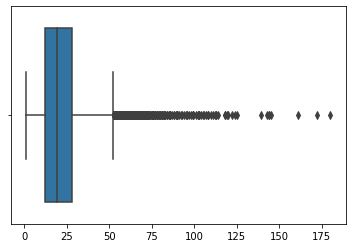

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(lengths)
plt.show()

In [75]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 125

X_train = tf.keras.preprocessing.sequence.pad_sequences(
    train_text, maxlen = max_len, padding = 'pre',
    truncating='post', value=0.0
)

X_test = tf.keras.preprocessing.sequence.pad_sequences(
    test_text, maxlen = X_train.shape[1], dtype = 'int32', padding='pre',
    truncating='post', value=0.0
)

y_train = tf.keras.preprocessing.sequence.pad_sequences(
    train_label, maxlen = max_len, padding = 'pre',
    truncating='post', value=0.0
)

y_test = tf.keras.preprocessing.sequence.pad_sequences(
    test_label, maxlen = y_train.shape[1], dtype = 'int32', padding='pre',
    truncating='post', value=0.0
)


In [76]:
X_train.shape,X_test.shape

((54151, 125), (18051, 125))

In [77]:
y_train.shape,y_test.shape

((54151, 125), (18051, 125))

In [78]:
!pip install scikit-plot

In [79]:
#Importing the required libraries
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score,log_loss

In [80]:
import numpy as np
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [28]:
output_vec = 300
vocab_size = len(word_tokenizer.word_index) + 1
num_classes = max(np.unique(y_train))

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = vocab_size,output_dim = output_vec, input_length = max_len, trainable = True)) 
model.add(tf.keras.layers.LSTM(units = 64, activation="tanh", return_sequences=True, return_state=False)) #dropout=0.2
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_classes+1, activation = tf.nn.softmax, name='output_layer')))

In [30]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Embedding(input_dim = vocab_size,output_dim = output_vec, input_length = max_len, trainable = True)) 
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 64, activation="tanh", return_sequences=True, return_state=False))) #dropout=0.2
# model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(5, activation = tf.nn.softmax, name='output_layer')))

In [31]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Embedding(input_dim = vocab_size,output_dim = output_vec, input_length = max_len, trainable = True)) 
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units = 64, activation="tanh", return_sequences=True, return_state=False))) #dropout=0.2
# model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(5, activation = tf.nn.softmax, name='output_layer')))

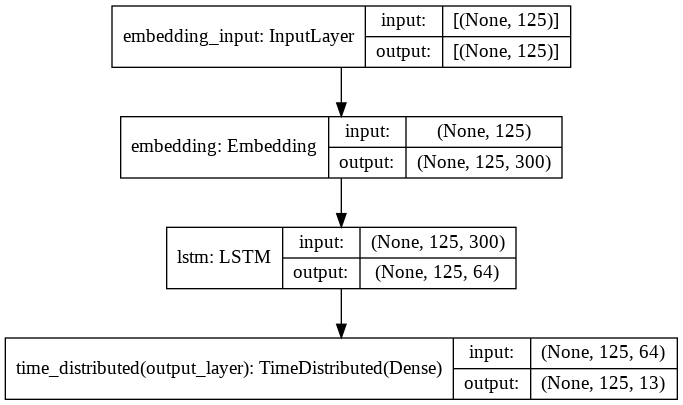

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 125, 300)          15622500  
_________________________________________________________________
lstm (LSTM)                  (None, 125, 64)           93440     
_________________________________________________________________
time_distributed (TimeDistri (None, 125, 13)           845       
Total params: 15,716,785
Trainable params: 15,716,785
Non-trainable params: 0
_________________________________________________________________


In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np
import time

def balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()
  y_pred = np.argmax(y_pred,axis=-1)

  y_true = y_true.ravel()
  y_pred = y_pred.ravel()

  #Here we will remove the padded zeroes since they will increase the balanced accuracy
  #You can also remove tokens corresponding to punctuation like ',' or '!' since there output is not useful
  y_true = np.trim_zeros(y_true, 'f')  
  y_pred = y_pred[(y_pred.shape[0] - y_true.shape[0]):]

  num_classes = len(np.unique(y_true))

  cm = confusion_matrix(y_true, y_pred).T
  balanced_accuracy = 0
  for i in range(num_classes):
    num = cm[i,i]
    den = np.sum(cm[:,i])
    if num == 0 :
      acc = 0
    else:
      acc = num / den
    balanced_accuracy += acc

  return (balanced_accuracy / num_classes)

In [35]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.sparse_categorical_crossentropy, #binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [36]:
batch_size = 32
steps_per_epoch = len(X_train) // batch_size
validation_batch_size = 32
validation_steps = len(X_test) // validation_batch_size

In [37]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_balanced_accuracy', min_delta=0, patience=3,
    mode='max', baseline=None, restore_best_weights=True
)

In [42]:
print('Results for RNN Classifier:-\n')
start_time = time.time()

result = model.fit(X_train, y_train, 
                   validation_data = (X_test, y_test), 
                   callbacks=[callback],
                   epochs = 2,
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps
                   )

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)


Results for RNN Classifier:-

Epoch 1/2
1692/1692 [==============================] - 703s 415ms/step - loss: 0.0105 - balanced_accuracy: 0.9720 - val_loss: 0.0206 - val_balanced_accuracy: 0.9450
Epoch 2/2
1692/1692 [==============================] - 712s 421ms/step - loss: 0.0085 - balanced_accuracy: 0.9776 - val_loss: 0.0217 - val_balanced_accuracy: 0.9394

Training time(sec) =  1414.4132163524628


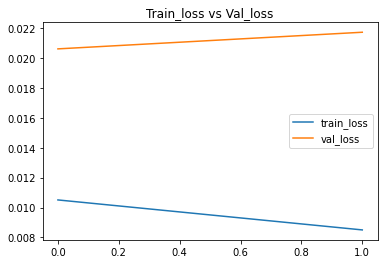

In [43]:
plt.plot(result.history['loss'] , label = 'train_loss')
plt.plot(result.history['val_loss'] , label = 'val_loss')
plt.title('Train_loss vs Val_loss')
plt.legend()
plt.show()

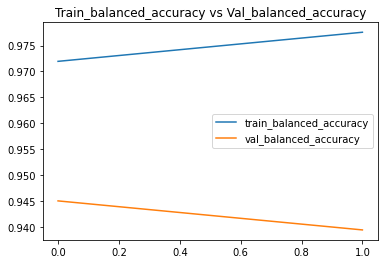

In [44]:
plt.plot(result.history['balanced_accuracy'] , label = 'train_balanced_accuracy')
plt.plot(result.history['val_balanced_accuracy'] , label = 'val_balanced_accuracy')
plt.title('Train_balanced_accuracy vs Val_balanced_accuracy')
plt.legend()
plt.show()

Prediction time(sec) =  4.99218487739563
565/565 [==============================] - 6s 11ms/step - loss: 0.0000e+00 - balanced_accuracy: 0.0000e+00


Training score =  0.9815458035652681
Tesing score =  0.9364924093308853


No of missclassified for class 0 (test data) = 0 
No of missclassified for class 1 (test data) = 2976 
No of missclassified for class 2 (test data) = 1782 
No of missclassified for class 3 (test data) = 15 
No of missclassified for class 4 (test data) = 1476 
No of missclassified for class 5 (test data) = 808 
No of missclassified for class 6 (test data) = 3302 
No of missclassified for class 7 (test data) = 1836 
No of missclassified for class 8 (test data) = 676 
No of missclassified for class 9 (test data) = 57 
No of missclassified for class 10 (test data) = 1732 
No of missclassified for class 11 (test data) = 626 
No of missclassified for class 12 (test data) = 366 
Total no of missclassified points(test data) =  15652
Total % of missclassified points(test dat

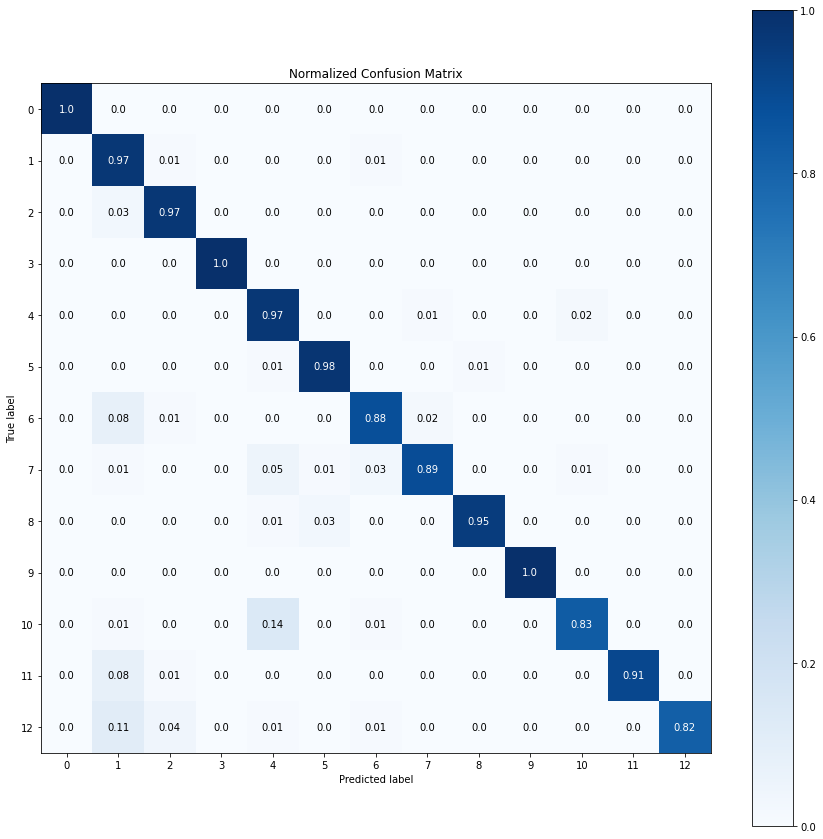



Classification report:-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1876984
           1       0.95      0.97      0.96     95505
           2       0.97      0.97      0.97     58410
           3       1.00      1.00      1.00     47698
           4       0.94      0.97      0.95     45427
           5       0.98      0.98      0.98     42037
           6       0.92      0.88      0.90     27020
           7       0.93      0.89      0.91     17112
           8       0.97      0.95      0.96     14933
           9       0.99      1.00      0.99     11722
          10       0.88      0.83      0.85     10401
          11       0.98      0.91      0.94      7059
          12       0.96      0.82      0.89      2067

    accuracy                           0.99   2256375
   macro avg       0.96      0.94      0.95   2256375
weighted avg       0.99      0.99      0.99   2256375

****************************************************

In [81]:
def print_results(y_train,y_test):
  y_pred1 = model.predict(X_train)
  y_pred1 = np.argmax(y_pred1, axis=2)

  start_time = time.time()
  y_pred = model.predict(X_test)
  y_pred = np.argmax(y_pred, axis=2)
  model_time2 = (time.time() - start_time)
  print('Prediction time(sec) = ',model_time2)

  y_train = y_train.ravel()
  y_test = y_test.ravel()
  y_pred1 = y_pred1.ravel()
  y_pred = y_pred.ravel()

  cm_model = confusion_matrix(y_test, y_pred)
  model_miss = np.sum(y_pred!=y_test.ravel())
  acc1_model = balanced_accuracy_score(y_train,y_pred1)
  acc2_model = balanced_accuracy_score(y_test,y_pred)

  loss1_model = model.evaluate(X_train)[0]
  loss2_model = model.evaluate(X_test)[0]

  print('\n\nTraining score = ',acc1_model)
  print('Tesing score = ',acc2_model)
  print('\n')

  label = list(tag_tokenizer.word_index.values())
  label.insert(0,0)
  for i in range(len(np.unique(y_test))):
      err = np.sum(cm_model[i])-cm_model[i][i]
      print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
  print('Total no of missclassified points(test data) = ',model_miss)
  print('Total % of missclassified points(test data) = ',model_miss/len(y_test))
  print('\n\nTraining log_loss = ',loss1_model)
  print('Tesing log_loss = ',loss2_model)

  print('\n')
  tags = tag_tokenizer.word_index
  tags['padding'] = 0
  print(dict(sorted(tags.items(), key=lambda x:x[1])))
  print('\n\nConfusion matrix:')
  skplt.metrics.plot_confusion_matrix(y_test, y_pred , figsize = (15,15),normalize=True)
  plt.show()
  print('\n\nClassification report:-\n')
  print(classification_report(y_test,y_pred))
  print('**************************************************************************')

  # RNN = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),loss1_model,loss2_model,model_time,model_time2]

print_results(y_train,y_test)

In [82]:
print(y_train.shape)
print(y_test.shape)

(54151, 125)
(18051, 125)


In [83]:
import re
def text_preprocess(text):
  text = re.sub('[^A-Za-z0-9]+', ' ', text)
  text = text.rstrip()
  text = text.lstrip()
  return text

In [90]:
def predict(text, max_len, tags_dict, word_tokenizer):

  original_text = text
  text = text_preprocess(text)
  text = text.split(' ')
  words = word_tokenizer.texts_to_sequences(text)
  words_dict = word_tokenizer.word_index
  words_dict = dict([(value, key) for key, value in words_dict.items()])
  words = np.array(words)
  words = words.ravel()

  words = tf.keras.preprocessing.sequence.pad_sequences(
    [words], maxlen = max_len, padding = 'pre',
    truncating='post', value=0.0 )
  
  words = np.array(words)
  original_words = words

  pred = model.predict(words)
  pred_prob = np.max(pred,axis=2)
  pred = np.argmax(pred,axis=2)

  pred = pred.ravel()
  pred = np.trim_zeros(pred, 'f')
  pred_prob = pred_prob.ravel()
  pred_prob = pred_prob[(pred_prob.shape[0] - pred.shape[0]):]
  original_words = original_words.ravel()
  original_words = np.trim_zeros(original_words, 'f')

  output = []
  for i in range(len(pred)):
    temp = []
    if words_dict[original_words[i]] == '<OOV>':
      temp.append(text[i])
    else:
      temp.append(words_dict[original_words[i]])
    temp.append(tags_dict[pred[i]])
    temp.append(pred_prob[i])
    output.append(temp)

  return original_text, output


In [91]:
tags_dict = tag_tokenizer.word_index
tags_dict = dict([(value, key) for key, value in tags_dict.items()])

In [95]:
max_len = 125
text = 'I like to eat icecream'

my_text, output = predict(text, max_len,tags_dict, word_tokenizer)

In [96]:
my_text

'I like to eat icecream'

In [97]:
output

[['i', 'pron', 0.9996369],
 ['like', 'verb', 0.93804646],
 ['to', 'prt', 0.9488622],
 ['eat', 'verb', 0.9999945],
 ['icecream', 'noun', 0.27760008]]

In [98]:
save_path = '/content/drive/MyDrive/Dl projects/RNN basics/parts of speech'
model_name = 'rnn_pos_model'
model_path = save_path + '/' + model_name
model.save(model_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dl projects/RNN basics/parts of speech/rnn_pos_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dl projects/RNN basics/parts of speech/rnn_pos_model/assets


In [100]:
import os
os.chdir(save_path)
print(os.getcwd())

import joblib
joblib.dump(tags_dict , 'tags.joblib')
joblib.dump(word_tokenizer , 'tokenizer.joblib')

/content/drive/MyDrive/Dl projects/RNN basics/parts of speech


['tokenizer.joblib']